<a href="https://colab.research.google.com/github/rajnish80130/knn-task/blob/main/kneighbors_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.drop(columns=["id","Unnamed: 32"],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 31)

In [7]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
print(X_train.shape)
print(y_train.shape)

(455, 30)
(455,)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-0.21760709,  0.52416273, -0.26023892, ..., -0.08082946,
         0.14012766, -0.71004068],
       [ 0.5435909 , -0.75897728,  0.55355552, ...,  0.13107631,
         0.407503  ,  0.30263452],
       [-0.92582792, -1.48321783, -0.96765764, ..., -1.17344002,
        -0.29036344, -0.40914105],
       ...,
       [-0.70555451,  1.19018459, -0.65702438, ...,  0.21797292,
        -0.18105906,  0.86647242],
       [-0.12559414,  0.68950382, -0.08024959, ...,  0.77441614,
         0.28474577,  0.51086376],
       [-1.54733353, -1.13623441, -1.54483689, ..., -1.77607565,
        -0.5358779 , -0.31814543]])

In [16]:
X_test

array([[-0.71391933, -0.5261025 , -0.76501797, ..., -1.12633291,
        -0.30213468, -0.88924065],
       [ 0.36514155,  3.31400254,  0.44839321, ...,  1.29427131,
         1.0111995 ,  2.02206099],
       [-0.63863601,  0.51251899, -0.65055285, ..., -0.67126907,
        -0.7948452 ,  0.06872553],
       ...,
       [-0.68882489, -0.41199386, -0.67643895, ..., -0.23632866,
        -0.72758097, -0.36894667],
       [ 0.87260688,  0.8688174 ,  0.7436566 , ..., -0.52064828,
        -0.77130272, -1.06229981],
       [-0.17578302,  0.58471017, -0.22060082, ..., -0.83256138,
        -0.78139235, -0.77814784]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(X_train,y_train)
pred1 = knn.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(pred1,y_test)

0.956140350877193

In [23]:
scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

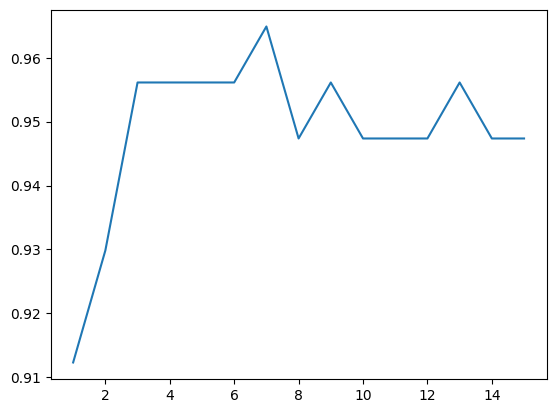

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)